# Trabalho Prático de Sensorização e Ambiente

### Imports

In [12]:
import datetime
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import time
import math
from sklearn.svm import SVC
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

## Visualização e Estudo dos Dados - 

### Informação dos dados

In [13]:
dataset = pd.read_csv('docs/data.csv', sep=";")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAC Address         2125 non-null   object 
 1   Timestamp           2125 non-null   int64  
 2   S1 Signal Strength  2125 non-null   float64
 3   Distance to S1      2125 non-null   float64
 4   S2 Signal Strength  2125 non-null   float64
 5   Distance to S2      2125 non-null   float64
 6   Year                2125 non-null   int64  
 7   Month               2125 non-null   int64  
 8   Day                 2125 non-null   int64  
 9   Day of the Week     2125 non-null   object 
 10  Hour                2125 non-null   int64  
 11  Minute              2125 non-null   int64  
 12  X                   2125 non-null   float64
 13  Y                   2125 non-null   float64
 14  Device              2125 non-null   object 
 15  Area                2125 non-null   object 
dtypes: flo

### Visualização de Outliers

#### Feature S1 Signal Strength

<Axes: >

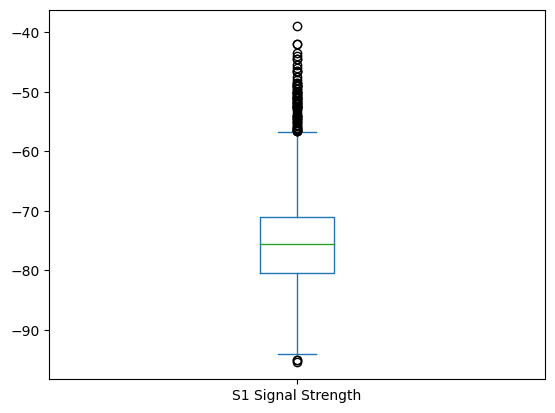

In [59]:
dataset["S1 Signal Strength"].plot.box()

#### Feature Distance to S1

<Axes: >

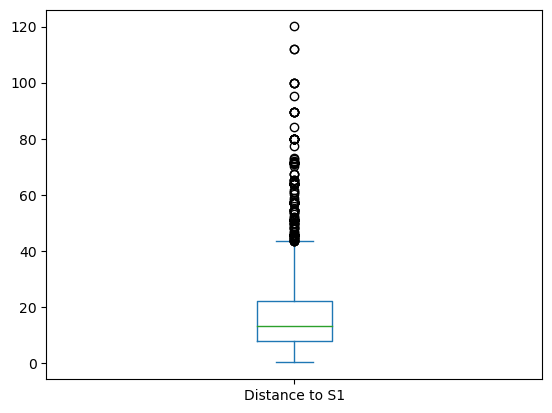

In [60]:
dataset["Distance to S1"].plot.box()

#### Feature S2 Signal Strength

<Axes: >

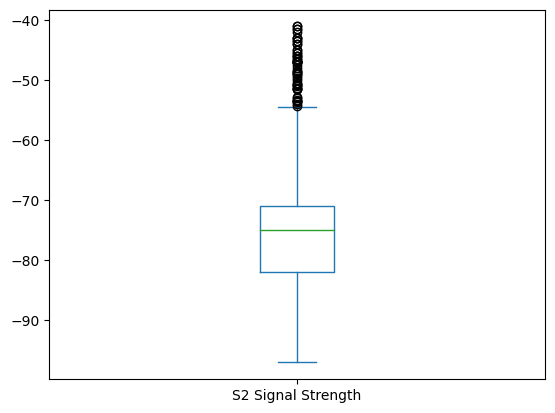

In [61]:
dataset["S2 Signal Strength"].plot.box()

#### Feature Distance to S2

<Axes: >

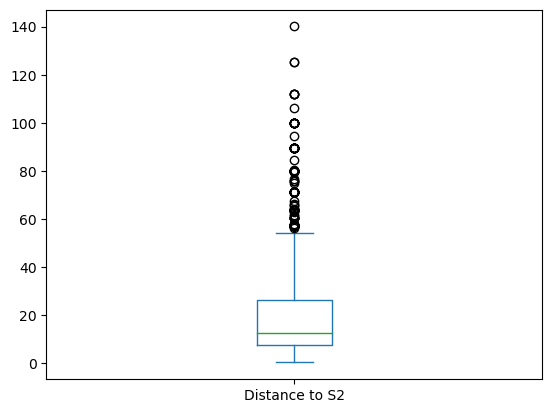

In [62]:
dataset["Distance to S2"].plot.box()

#### Feature X

<Axes: >

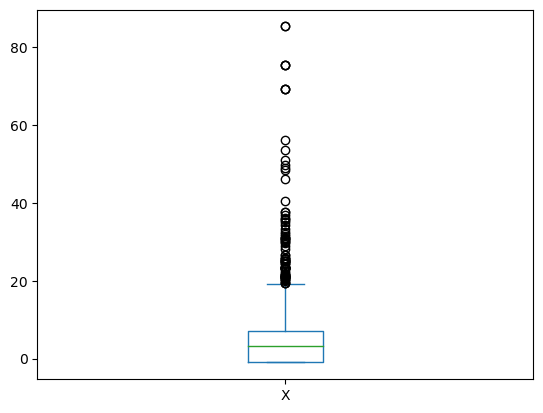

In [63]:
dataset["X"].plot.box()

#### Feature Y

<Axes: >

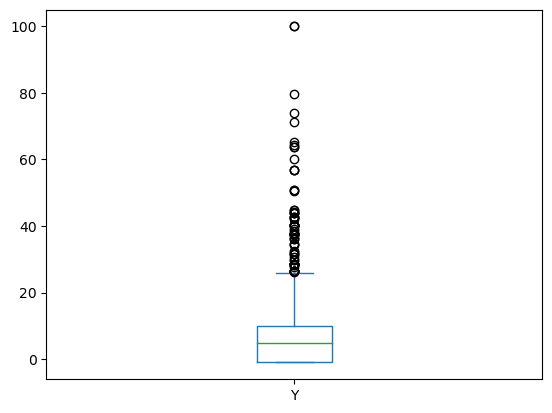

In [64]:
dataset["Y"].plot.box()

### Valores em falta

<Axes: >

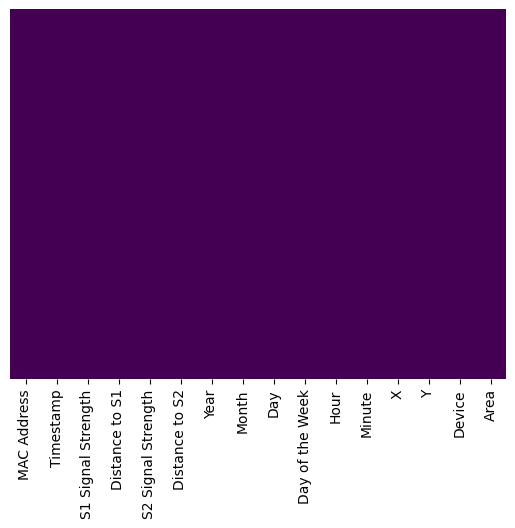

In [65]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Valores duplicados

In [66]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2120    False
2121    False
2122    False
2123    False
2124    False
Length: 2125, dtype: bool

### Features nominais

#### Feature Area

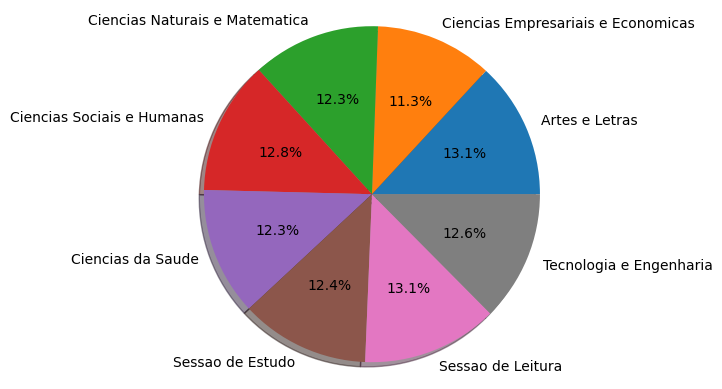

In [67]:
labels = dataset['Area'].astype('category').cat.categories.tolist()
counts = dataset['Area'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: >

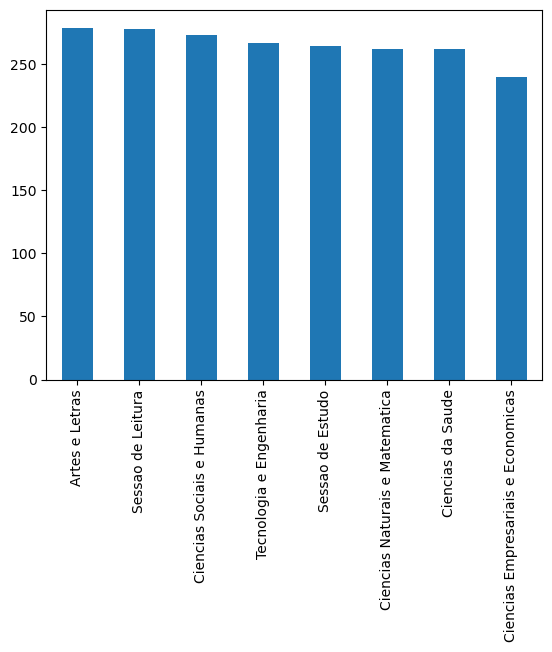

In [68]:
dataset['Area'].value_counts().plot(kind='bar')

#### Feature Device

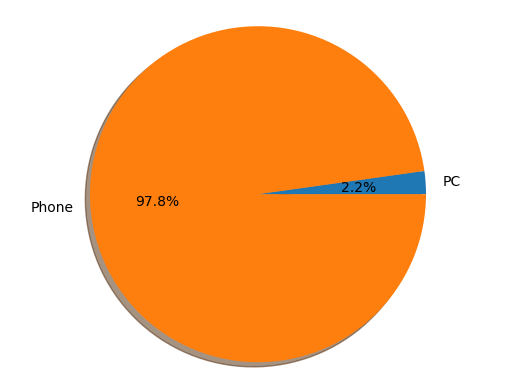

In [69]:
labels = dataset['Device'].astype('category').cat.categories.tolist()
counts = dataset['Device'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: >

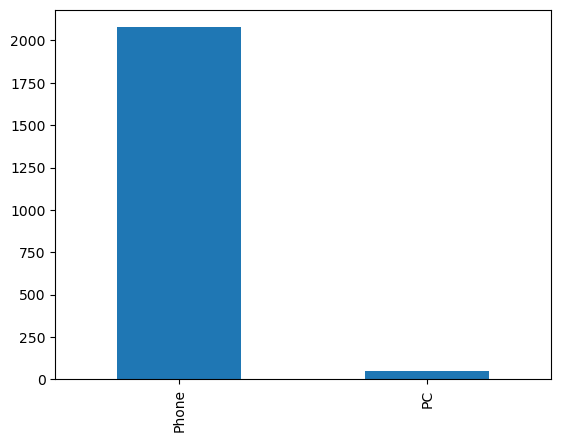

In [70]:
dataset['Device'].value_counts().plot(kind='bar')

#### Feature Day of the Week

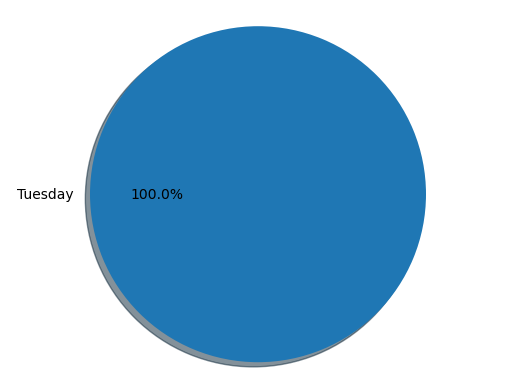

In [71]:
labels = dataset['Day of the Week'].astype('category').cat.categories.tolist()
counts = dataset['Day of the Week'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: >

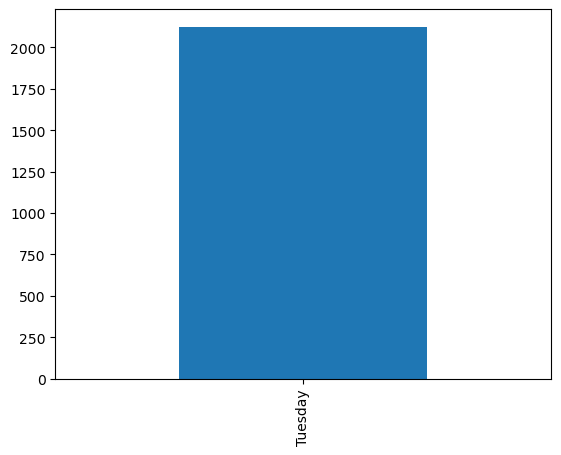

In [72]:
dataset['Day of the Week'].value_counts().plot(kind='bar')

#### Análise da tendência central dos dados

In [73]:
dataset[["S1 Signal Strength", "Distance to S1", "S2 Signal Strength", 
         "Distance to S2", "X", "Y"]].describe()


,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,X,Y
count,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,-75.411347,18.195990,-75.719734,20.703728,4.809794,6.347622
std,8.186494,16.138598,9.153501,20.683840,8.217800,9.571703
min,-95.500000,0.208837,-97.000000,0.259797,-1.000000,-1.000000
25%,-80.500000,8.000618,-82.000000,7.551770,-1.000000,-1.000000
50%,-75.500000,13.241928,-75.000000,12.538498,3.218637,4.869622
75%,-71.000000,22.263756,-71.000000,26.143754,7.128199,9.858198
max,-39.000000,120.034409,-41.000000,140.068818,85.358753,99.874922


#### Análise da dispersão estatística dos dados

<Axes: xlabel='Y', ylabel='Count'>

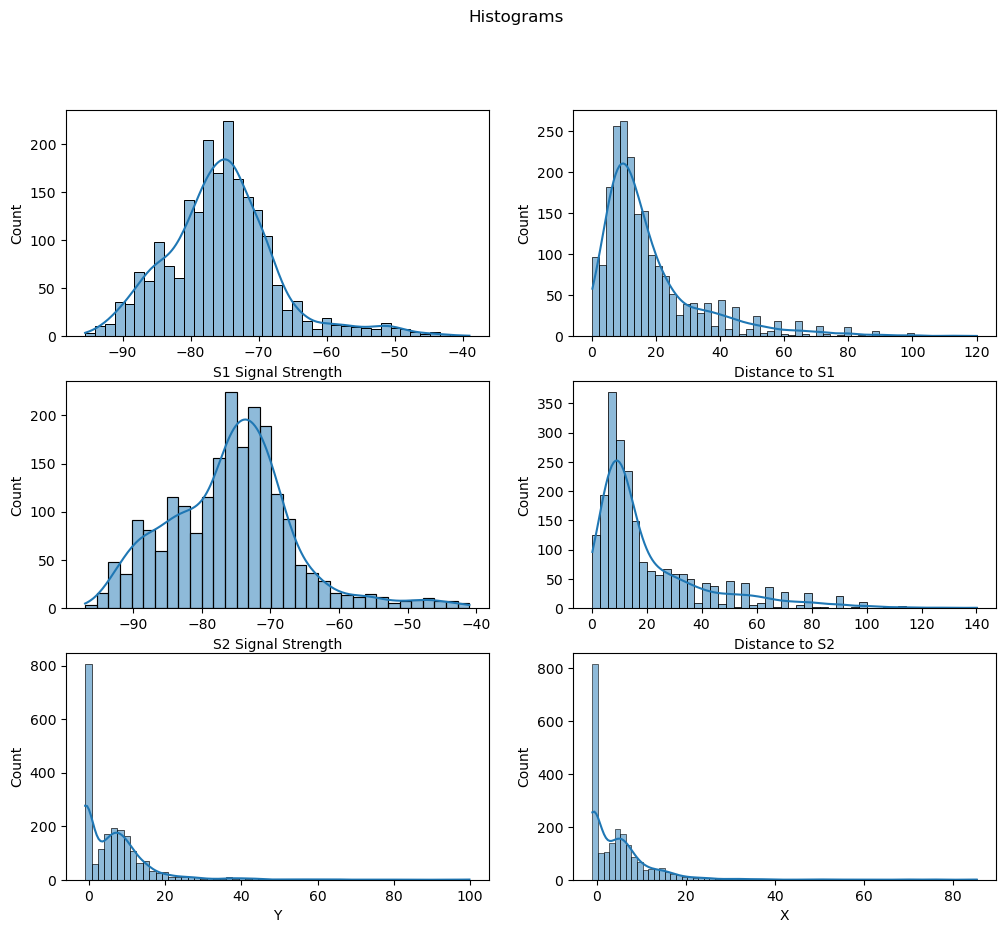

In [74]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Histograms')

sns.histplot(dataset['S1 Signal Strength'], ax=axs[0, 0], kde=True)
sns.histplot(dataset['Distance to S1'], ax=axs[0, 1], kde=True)
sns.histplot(dataset['S2 Signal Strength'], ax=axs[1, 0], kde=True)
sns.histplot(dataset['Distance to S2'], ax=axs[1, 1], kde=True)
sns.histplot(dataset['X'], ax=axs[2, 1], kde=True)
sns.histplot(dataset['Y'], ax=axs[2, 0], kde=True)

#### Análise multivariada

C:\Users\franc\AppData\Local\Temp\ipykernel_11912\2356323949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


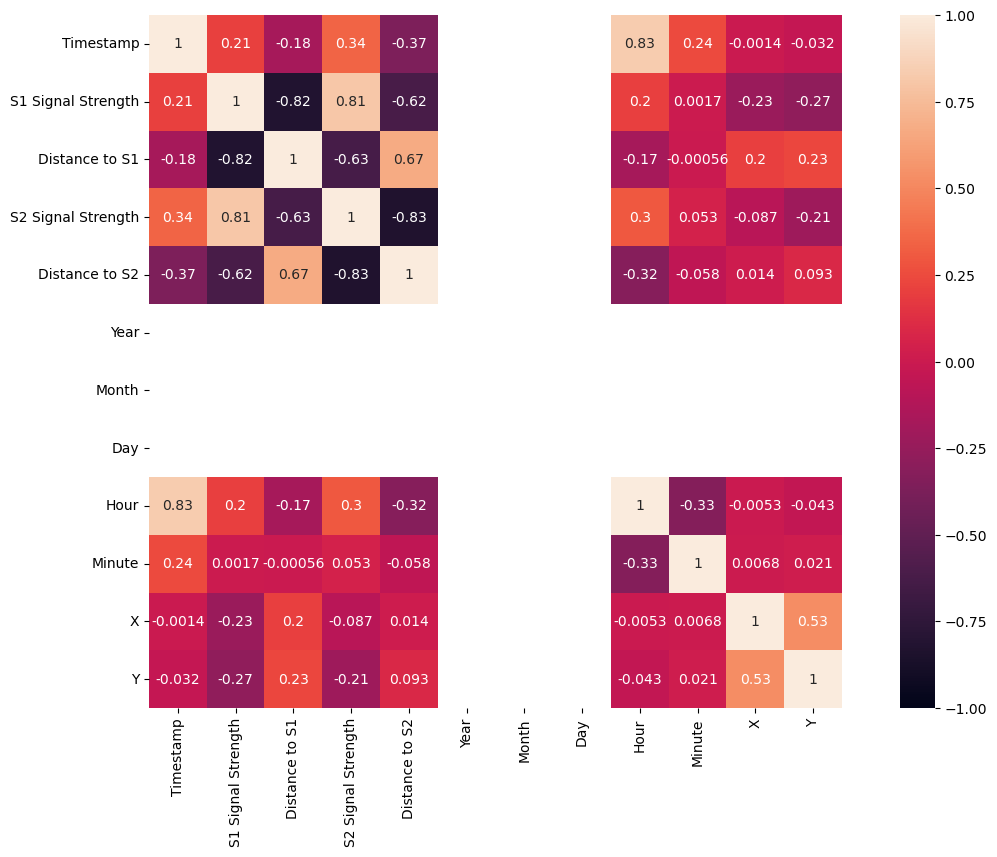

In [4]:
corr_matrix = dataset.corr()
f, ax = plt.subplots(figsize=(15, 9))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

### Relações

In [ ]:
sns.pairplot(dataset)

Error in callback <function flush_figures at 0x00000173C2CB6D30> (for post_execute):


## Tratamento e Preparação dos dados


### Eliminação de features

In [14]:
dataset = dataset.drop(columns=["Year", "Month", "Day", "MAC Address"])
dataset

,Timestamp,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,Day of the Week,Hour,Minute,X,Y,Device,Area
0,28050575,-86.000000,40.972258,-84.000000,32.523339,Tuesday,14,35,36.047917,19.474948,PC,Ciencias da Saude
1,28050575,-86.000000,40.715155,-90.000000,63.808429,Tuesday,14,35,-1.000000,-1.000000,PC,Ciencias Empresariais e Economicas
2,28050556,-59.750000,3.282271,-59.000000,2.069920,Tuesday,14,16,-1.000000,-1.000000,PC,Ciencias Empresariais e Economicas
3,28050563,-57.000000,1.567191,-62.888889,3.068217,Tuesday,14,23,-1.000000,-1.000000,PC,Artes e Letras
4,28050571,-67.222222,5.516798,-59.571429,2.095195,Tuesday,14,31,-1.000000,-1.000000,PC,Tecnologia e Engenharia
...,...,...,...,...,...,...,...,...,...,...,...,...
2120,28050592,-88.000000,50.970286,-93.000000,89.375712,Tuesday,14,52,-1.000000,-1.000000,Phone,Ciencias Sociais e Humanas
2121,28050641,-92.750000,95.256397,-78.500000,19.822820,Tuesday,15,41,-1.000000,-1.000000,Phone,Ciencias Sociais e Humanas
2122,28050642,-87.600000,49.435862,-85.000000,36.389460,Tuesday,15,42,-1.000000,-1.000000,Phone,Tecnologia e Engenharia
2123,28050643,-89.625000,71.214183,-86.000000,40.715155,Tuesday,15,43,-1.000000,-1.000000,Phone,Tecnologia e Engenharia


#### Normalização dos dados

In [15]:
columns = {"S1 Signal Strength", "Distance to S1", "S2 Signal Strength",
          "Distance to S2", "X", "Y"}

for column in columns:
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())         
        
dataset

,Timestamp,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,Day of the Week,Hour,Minute,X,Y,Device,Area
0,28050575,0.168142,0.340190,0.232143,0.230769,Tuesday,14,35,0.429000,0.202974,PC,Ciencias da Saude
1,28050575,0.168142,0.338044,0.125000,0.454539,Tuesday,14,35,0.000000,0.000000,PC,Ciencias Empresariais e Economicas
2,28050556,0.632743,0.025649,0.678571,0.012947,Tuesday,14,16,0.000000,0.000000,PC,Ciencias Empresariais e Economicas
3,28050563,0.681416,0.011336,0.609127,0.020088,Tuesday,14,23,0.000000,0.000000,PC,Artes e Letras
4,28050571,0.500492,0.044297,0.668367,0.013128,Tuesday,14,31,0.000000,0.000000,PC,Tecnologia e Engenharia
...,...,...,...,...,...,...,...,...,...,...,...,...
2120,28050592,0.132743,0.423628,0.071429,0.637412,Tuesday,14,52,0.000000,0.000000,Phone,Ciencias Sociais e Humanas
2121,28050641,0.048673,0.793216,0.330357,0.139927,Tuesday,15,41,0.000000,0.000000,Phone,Ciencias Sociais e Humanas
2122,28050642,0.139823,0.410822,0.214286,0.258422,Tuesday,15,42,0.000000,0.000000,Phone,Tecnologia e Engenharia
2123,28050643,0.103982,0.592573,0.196429,0.289362,Tuesday,15,43,0.000000,0.000000,Phone,Tecnologia e Engenharia


### Discretização de valores nominais

#### Label Encoding

In [16]:
scale_mapper1 = {"Friday":5} #, "Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Saturday":6, "Sunday":7}
scale_mapper2 = {"Phone":1} #, "PC":2
scale_mapper3 = {'Tecnologia e Engenharia' : 1, 'Ciencias da Saude' : 2, 'Artes e Letras' : 3, 'Ciencias Naturais e Matematica' : 4, 
                 'Ciencias Sociais e Humanas' : 5, 'Ciencias Empresariais e Economicas' : 6, 'Sessao de Estudo' : 7, 
                 'Sessao de Leitura' : 8}
dataset["Day of the Week"] = dataset["Day of the Week"].replace(scale_mapper1)
dataset["Device"] = dataset["Device"].replace(scale_mapper2)
dataset["Area"] = dataset["Area"].replace(scale_mapper3)
dataset

,Timestamp,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,Day of the Week,Hour,Minute,X,Y,Device,Area
0,28050575,0.168142,0.340190,0.232143,0.230769,Tuesday,14,35,0.429000,0.202974,PC,2
1,28050575,0.168142,0.338044,0.125000,0.454539,Tuesday,14,35,0.000000,0.000000,PC,6
2,28050556,0.632743,0.025649,0.678571,0.012947,Tuesday,14,16,0.000000,0.000000,PC,6
3,28050563,0.681416,0.011336,0.609127,0.020088,Tuesday,14,23,0.000000,0.000000,PC,3
4,28050571,0.500492,0.044297,0.668367,0.013128,Tuesday,14,31,0.000000,0.000000,PC,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2120,28050592,0.132743,0.423628,0.071429,0.637412,Tuesday,14,52,0.000000,0.000000,1,5
2121,28050641,0.048673,0.793216,0.330357,0.139927,Tuesday,15,41,0.000000,0.000000,1,5
2122,28050642,0.139823,0.410822,0.214286,0.258422,Tuesday,15,42,0.000000,0.000000,1,1
2123,28050643,0.103982,0.592573,0.196429,0.289362,Tuesday,15,43,0.000000,0.000000,1,1


### Correlação entre features

C:\Users\franc\AppData\Local\Temp\ipykernel_11912\2019259031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


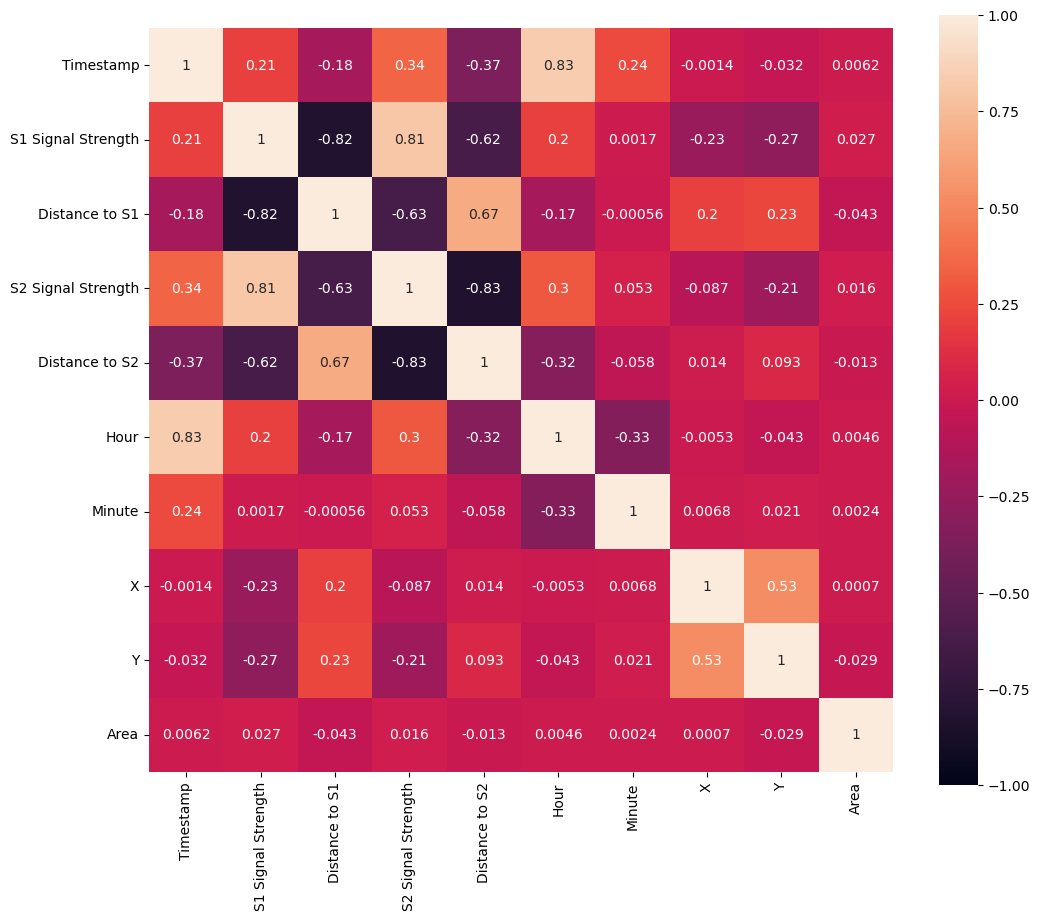

In [17]:
corr_matrix = dataset.corr()
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

## Modelos de Machine Learning

In [18]:
model = dataset
dataset = dataset.drop(columns=['Day of the Week'])

X = dataset[['Timestamp', 'S1 Signal Strength', 'Distance to S1', 'S2 Signal Strength', 'Distance to S2', 
             'Hour', 'Minute', 'X', 'Y', 'Device']]
y = model['Day of the Week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Random Tree Forest

In [19]:
starttime = time.process_time()

modelForest = RandomForestClassifier(n_estimators = 6000, max_features = 7, random_state = 42)

print(modelForest)
modelForest.fit(X_train, y_train)

endtime = time.process_time()
print(f"Tempo decorrido: {endtime - starttime} segundos")

RandomForestClassifier(max_features=7, n_estimators=6000, random_state=42)


ValueError: could not convert string to float: 'PC'

#### Resultados

In [25]:
predictionsForest = modelForest.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictionsForest))
print("Modelo Random Tree Forest Classifier: \n", classification_report(y_test, predictionsForest))

Accuracy:  1.0
Modelo Random Tree Forest Classifier: 
               precision    recall  f1-score   support

           5       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



#### Matriz de confusão

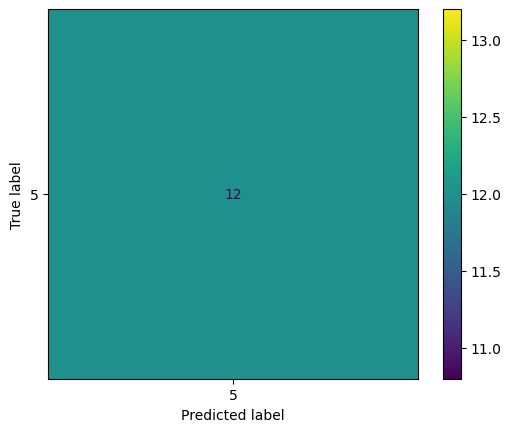

In [26]:
cm = confusion_matrix(y_test, predictionsForest, labels=modelForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelForest.classes_)

disp.plot()